### ML for Red and white Wine

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import red an white

In [170]:

red_wine = pd.read_csv("winequality-red.csv", sep =";")

#C:\Users\cumdi\Desktop\Bootcamp Visual Studio\Modul 1\Project_02\windedata\winequality-red.csv
# SEP-Argument seperiert die Daten, hier ist es  mit einem Semicolon

white_wine = pd.read_csv("winequality-white.csv", sep =";")

In [171]:
# create new column
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transform into categorical type
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high']) 

In [172]:
# create new column
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transform into categorical type
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

In [173]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium


In [174]:
white_wine.columns = white_wine.columns.str.replace(' ', '_')
red_wine.columns = red_wine.columns.str.replace( ' ','_') #replace Leerzeichen mit Unterstrich
red_wine.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,medium
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,medium
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,low


# Encoding Kategories to Numbers with Ordinal Encoder

In [175]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


oe = OrdinalEncoder(categories=[["low", "medium","high"]], dtype=int) # this is how you can define the label order
white_wine['quality_label'] = oe.fit_transform(white_wine[['quality_label']])
white_wine.tail(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [176]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


oe = OrdinalEncoder(categories=[["low", "medium","high"]], dtype=int) # this is how you can define the label order
red_wine['quality_label'] = oe.fit_transform(red_wine[['quality_label']])
red_wine.tail(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


## White wine Split Data

In [177]:
from sklearn.model_selection import train_test_split

X  = white_wine.drop(columns=['quality','quality_label'])
y = white_wine['quality_label']

print("original:", white_wine.shape, "\nX:", X.shape, "\ny:", y.shape)



original: (4898, 13) 
X: (4898, 11) 
y: (4898,)


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train, X_test)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4665            7.3              0.17         0.36            8.20      0.028   
1943            6.3              0.25         0.44           11.60      0.041   
3399            5.6              0.32         0.33            7.40      0.037   
843             6.9              0.19         0.35            1.70      0.036   
2580            7.7              0.30         0.26           18.95      0.053   
...             ...               ...          ...             ...        ...   
4426            6.2              0.21         0.52            6.50      0.047   
466             7.0              0.14         0.32            9.00      0.039   
3092            7.6              0.27         0.52            3.20      0.043   
3772            6.3              0.24         0.29           13.70      0.035   
860             8.1              0.27         0.35            1.70      0.030   

      free_sulfur_dioxide  

## Random forest 

In [179]:
# ausversehen gelöscht weiswein standard Random Forest
from sklearn.ensemble import RandomForestClassifier
RF_ww2 = RandomForestClassifier(random_state=40)
RF_ww2.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [180]:
pred1 = RF_ww2.predict(X_test)
pred1

array([1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0,

In [181]:
from sklearn.metrics import accuracy_score 


In [182]:
acc1 = accuracy_score(y_test, pred1)
acc1

0.8173469387755102

In [183]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,pred1)
cm1

array([[227,  94,   0],
       [ 64, 560,   0],
       [  1,  20,  14]], dtype=int64)

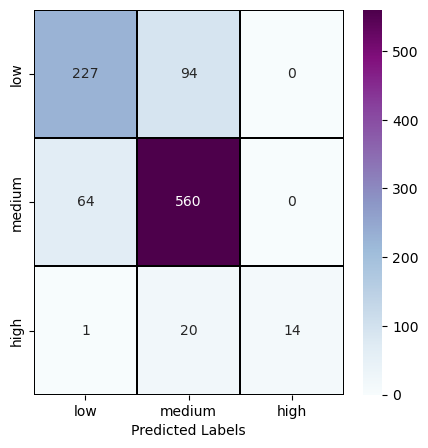

In [184]:
plt.figure(figsize=(5, 5))

# Plot der Heatmap mit einem "BuPu" colormap
ax = sns.heatmap(cm1, annot=True, cmap="BuPu", linewidths=0.2, linecolor='black', fmt="d", 
            xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])


plt.xlabel("Predicted Labels")
plt.show()

## White wine

In [185]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, LR_preds))

report = classification_report(y_test, pred1)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       321
           1       0.83      0.90      0.86       624
           2       1.00      0.40      0.57        35

    accuracy                           0.82       980
   macro avg       0.87      0.67      0.72       980
weighted avg       0.82      0.82      0.81       980



In [186]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(pred1, y_test)
print("Cohen-Kappa score:", kappa)

Cohen-Kappa score: 0.6063303127005714


## Red Wine Data split

In [187]:
from sklearn.model_selection import train_test_split

X  = red_wine.drop(columns=['quality','quality_label'])
y = red_wine['quality_label']

print("original:", red_wine.shape, "\nX:", X.shape, "\ny:", y.shape)


original: (1599, 13) 
X: (1599, 11) 
y: (1599,)


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train, X_test)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
493             8.7             0.690         0.31             3.0      0.086   
354             6.1             0.210         0.40             1.4      0.066   
342            10.9             0.390         0.47             1.8      0.118   
834             8.8             0.685         0.26             1.6      0.088   
705             8.4             1.035         0.15             6.0      0.073   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free_sulfur_dioxide  

## Random Forest Red wine 01

In [189]:
from sklearn.ensemble import RandomForestClassifier
RF_ww = RandomForestClassifier(random_state=40)
RF_ww.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [190]:
pred2 = RF_ww.predict(X_test)
pred2

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [191]:
from sklearn.metrics import accuracy_score 
acc2 = accuracy_score(y_test, pred2)
acc2

0.771875

In [192]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,pred2)
cm2

array([[108,  33,   0],
       [ 34, 139,   1],
       [  0,   5,   0]], dtype=int64)

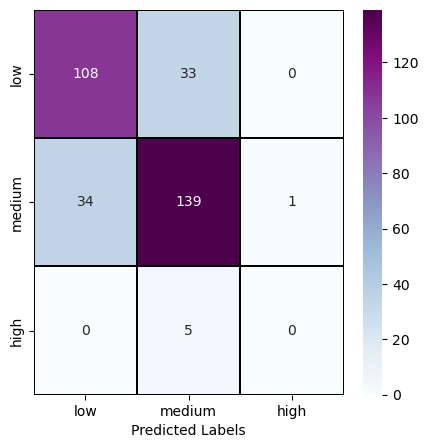

In [193]:
plt.figure(figsize=(5, 5))

# Plot der Heatmap mit einem "BuPu" colormap
ax = sns.heatmap(cm2, annot=True, cmap="BuPu", linewidths=0.2, linecolor='black', fmt="d", 
            xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])


plt.xlabel("Predicted Labels")
plt.show()

In [194]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, LR_preds))

report = classification_report(y_test, pred2)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       141
           1       0.79      0.80      0.79       174
           2       0.00      0.00      0.00         5

    accuracy                           0.77       320
   macro avg       0.52      0.52      0.52       320
weighted avg       0.76      0.77      0.77       320



In [195]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(pred2, y_test)
print("Cohen-Kappa score:", kappa)

Cohen-Kappa score: 0.547067377605429


## REDWINE HYPERPARAMTER

In [196]:
#Red WINE Hyperparameter

n_estimators = np.arange(10,201,10)
max_depth = np.arange(5, 55, 5)
min_samples_split = np.arange(2, 15, 2)
max_features = ["sqrt", "log2", None]

param_grid1= {
  'n_estimators': n_estimators,
  'max_depth': max_depth,
  'min_samples_split': min_samples_split,
  'max_features': max_features,
}

param_grid1

{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200]),
 'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
 'max_features': ['sqrt', 'log2', None]}

In [197]:
from sklearn.model_selection import RandomizedSearchCV

# redefine model
RF_rw = RandomForestClassifier(random_state=42)

In [198]:


RS_grid1 = RandomizedSearchCV(estimator=RF_rw, param_distributions=param_grid1, n_iter=10)
RS_grid1

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [199]:
RS_grid1.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [200]:
print(
  'best score: ', RS_grid1.best_score_,
  '\nparams: ', RS_grid1.best_params_
)


best score:  0.7944087009803922 
params:  {'n_estimators': 40, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 45}


In [201]:
RS_grid1.cv_results_

{'mean_fit_time': array([1.47129159, 0.08034916, 1.1312943 , 0.69736733, 0.14850855,
        0.07695217, 0.47243009, 0.5112823 , 1.74310365, 1.1177042 ]),
 'std_fit_time': array([0.11234753, 0.00549588, 0.01100076, 0.01161056, 0.00279851,
        0.0008934 , 0.00430329, 0.00458245, 0.13590738, 0.05430025]),
 'mean_score_time': array([0.02558484, 0.00519705, 0.01999025, 0.01638942, 0.00699515,
        0.00519671, 0.01639042, 0.00999441, 0.02538443, 0.01918945]),
 'std_score_time': array([0.00479664, 0.00074712, 0.0008934 , 0.00049043, 0.00089367,
        0.00074765, 0.00079925, 0.00109585, 0.00293819, 0.00193816]),
 'param_n_estimators': masked_array(data=[180, 20, 160, 150, 40, 20, 140, 70, 200, 150],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_min_samples_split': masked_array(data=[12, 12, 2, 6, 4, 4, 14, 14, 14, 12],
              mask=[False, False, False, False, False, False, Fals

In [202]:
import pandas as p

grid_results = pd.concat([
  pd.DataFrame(RS_grid1.cv_results_["params"]),
  pd.DataFrame(RS_grid1.cv_results_["mean_test_score"], columns=["Accuracy"])
], axis=1)

grid_results

,n_estimators,min_samples_split,max_features,max_depth,Accuracy
0,180,12,None,35,0.779553
1,20,12,sqrt,30,0.777996
2,160,2,None,10,0.791278
3,150,6,None,5,0.754540
4,40,4,log2,45,0.794409
5,20,4,log2,25,0.782687
6,140,14,log2,10,0.777993
7,70,14,None,25,0.774868
8,200,14,None,50,0.774078
9,150,12,None,35,0.782675
